In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
sns.set_style('whitegrid')

In C:\Users\jbrun\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\jbrun\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\jbrun\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\jbrun\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\jbrun\Ap

In [2]:
data_path = pathlib.Path('data', 'monthly_data.csv')
data = pd.read_csv(data_path)

population_data_path = pathlib.Path('data', 'population_2019.xlsx')
population_data = pd.read_excel(population_data_path)
population_data = population_data[population_data['County'].str.contains('County')]
population_data['County'] = population_data['County'].str.replace('County, Iowa', '')
population_data['County'] = population_data['County'].str.strip()
population_data['County'] = population_data['County'].str.replace('.','')
population_mapper = population_data.set_index('County')['Population'].to_dict()

counties_missing = set(data['County'].unique()) - set(population_mapper.keys())

county_conversions = {
    'Buena Vist': 'Buena Vista',
    'Cerro Gord': 'Cerro Gordo',
    'Obrien': "O'Brien",
    'Pottawatta': 'Pottawattamie',
}

data = data[data['County'] != 'El Paso']
myfilter = data['County'].isin(counties_missing)
data.loc[myfilter, 'County'] = data.loc[myfilter, 'County'].map(county_conversions)

data['Month Start'] = pd.to_datetime(data['Month Start'])
data = data[data['Month Start'] > pd.to_datetime('11/30/2017')]

top_categories = data.groupby('Category Name')['Volume Sold (Gallons)'].sum().nlargest(25).index.tolist()
myfilter = data['Category Name'].isin(top_categories)
data = data[myfilter]

data = data.reset_index(drop = True)

C:\Users\jbrun\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  if __name__ == '__main__':


<function matplotlib.pyplot.show(close=None, block=None)>

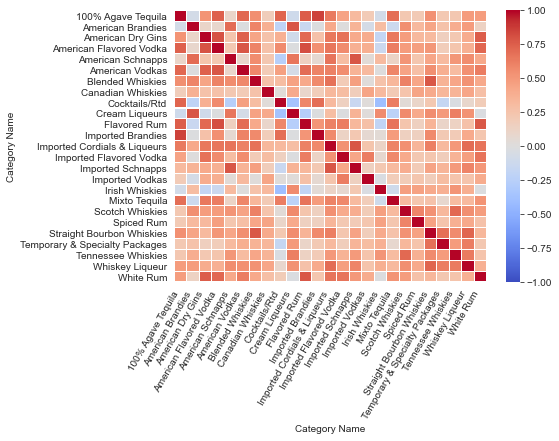

In [14]:
category_correlation = data.groupby(['Category Name', 'Month Start',])['Volume Sold (Gallons)'].sum()
category_correlation = category_correlation.reset_index()
category_correlation = category_correlation.pivot(
    index = 'Month Start',
    columns = 'Category Name',
    values = 'Volume Sold (Gallons)',
)
category_correlation = category_correlation.fillna(0)
category_correlation = category_correlation.corr()

fig, ax = plt.subplots(1,1,figsize  = (7, 5))

sns.heatmap(
    category_correlation, 
    vmin = -1, 
    vmax = 1,
    cmap = 'coolwarm',
    linewidths = 0.1,
)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 60, ha = 'right')

# plt.savefig('correlation.pdf', bbox_incehs = 'tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

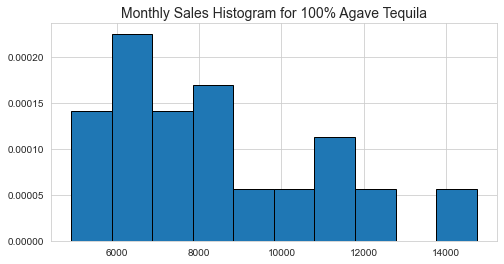

In [28]:
unique_categories = data['Category Name'].unique().tolist()

current_category = unique_categories[0]

fig, ax = plt.subplots(1,1, figsize  = (8, 4))

category_data = data[data['Category Name'] == current_category]
category_data = category_data.groupby('Month Start')['Volume Sold (Gallons)'].sum()

ax.hist(
    category_data.values,
    density = True,
    edgecolor = 'k',
)

ax.set_title(f'Monthly Sales Histogram for {current_category}', fontsize =14)

plt.show

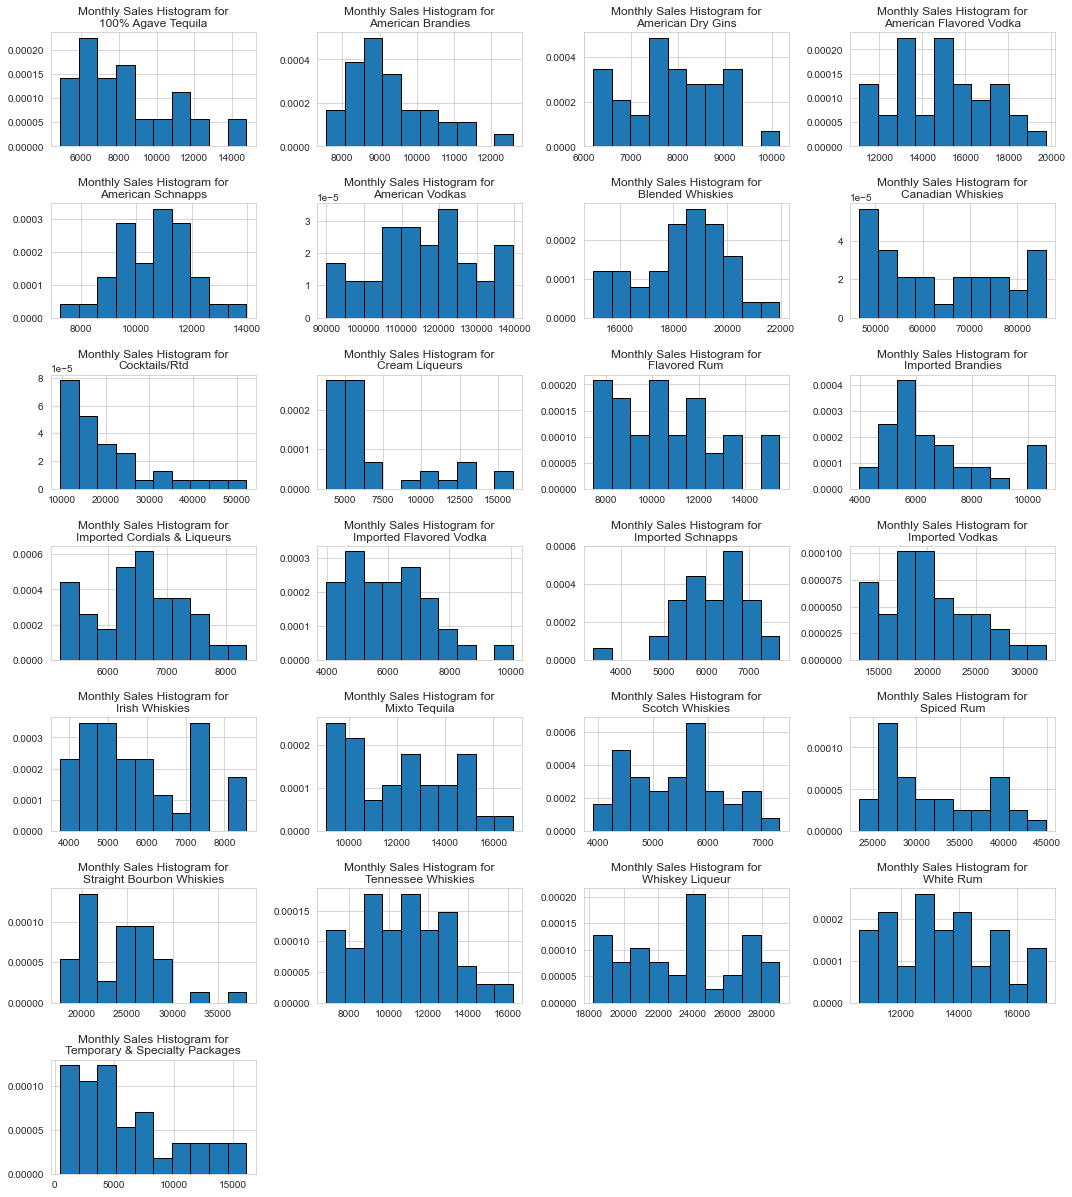

In [46]:
unique_categories = data['Category Name'].unique().tolist()

n_cols = 4
n_rows = len(unique_categories)//n_cols + 1

width_multiplier = 4.5
height_multiplier = 3
size = (n_cols*width_multiplier, height_multiplier* n_rows)

fig, ax = plt.subplots(n_rows, n_cols, figsize  = size)

for current_ax, current_category in zip(ax.ravel(), unique_categories):

    category_data = data[data['Category Name'] == current_category]
    category_data = category_data.groupby('Month Start')['Volume Sold (Gallons)'].sum()

    current_ax.hist(
        category_data.values,
        density = True,
        edgecolor = 'k',
    )

    current_ax.set_title(f'Monthly Sales Histogram for\n{current_category}', fontsize =12)
    
for current_ax in ax.ravel():
    if not current_ax.has_data():
        current_ax.axis('off')

plt.subplots_adjust(wspace = 0.3, hspace = 0.5)
# plt.savefig('histogram_plot.pdf', bbox_inches = 'tight')
plt.show()